<a href="https://colab.research.google.com/github/ylmgrbzz/FbProphet-Projects/blob/main/Predicting_Stock_Price_With_Yfinance_and_FbProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import pandas as pd
import seaborn as sns
from prophet import Prophet 
import yfinance as yf
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly 

In [ ]:
google=yf.download("GOOG","2005-01-01","2022-10-01")

[*********************100%***********************]  1 of 1 completed


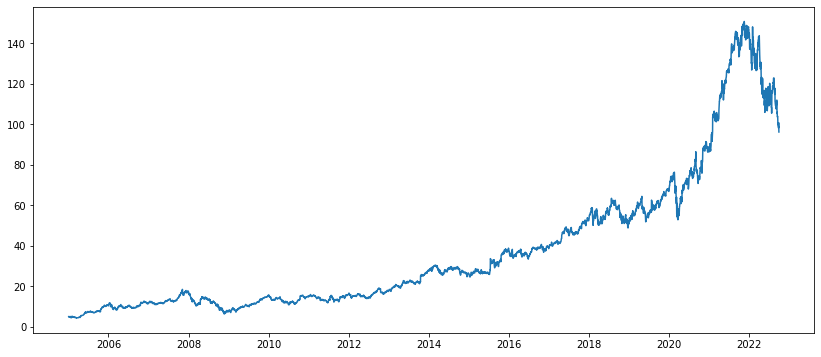

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(google.index,google["Close"])
plt.show()

In [ ]:
google.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,4.916571,5.071989,4.868253,5.048826,5.048826,636143518
2005-01-04,5.016198,5.054305,4.818937,4.844342,4.844342,552298420
2005-01-05,4.818190,4.904118,4.787804,4.819685,4.819685,330698912


In [ ]:
google=google.reset_index()

In [ ]:
google=google[["Date","Close"]]
google.columns=["ds","y"]

In [ ]:
google.head(3)

,ds,y
0,2005-01-03,5.048826
1,2005-01-04,4.844342
2,2005-01-05,4.819685


In [ ]:
model=Prophet()
model.fit(google)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpon_u210w/jrjtxcff.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpon_u210w/ywxip8wp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57568', 'data', 'file=/tmp/tmpon_u210w/jrjtxcff.json', 'init=/tmp/tmpon_u210w/ywxip8wp.json', 'output', 'file=/tmp/tmpjdv8r6dr/prophet_model-20221001082333.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:23:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:23:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=model.make_future_dataframe(periods=600)
tahmin=model.predict(future)

In [ ]:
plot_plotly(model,tahmin)

In [ ]:
apple=yf.download("AAPL","2017-10-01","2022-10-01")
tesla=yf.download("TSLA","2017-10-01","2022-10-01")
microsoft=yf.download("MSFT","2017-10-01","2022-10-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


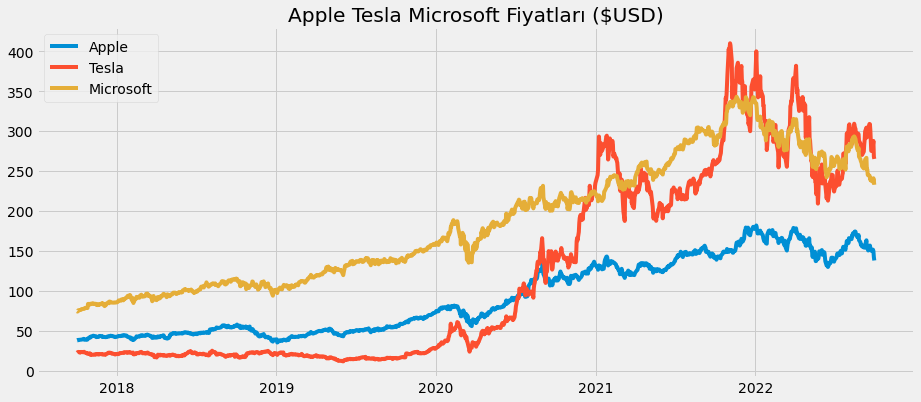

In [ ]:
plt.figure(figsize=(14,6))
plt.style.use("fivethirtyeight")
plt.plot(apple.index,apple["Close"])
plt.plot(tesla.index,tesla["Close"])
plt.plot(microsoft.index,microsoft["Close"])
plt.legend(["Apple","Tesla","Microsoft"])
plt.title("Apple Tesla Microsoft Fiyatları ($USD)")
plt.show()
